In [1]:
from FFP_SA import FFP

reading parameters...
NARROWBAND SIMULATION
ocean-atmosphere


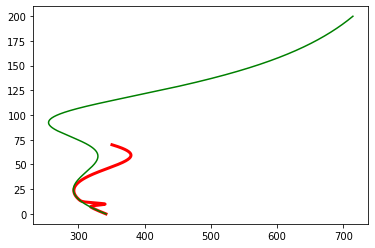

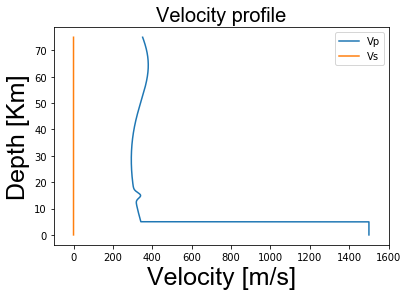

SOLVING ONLY FOR ACOUSTIC MEDIUM
Get Green's
Go to range
12.505951166152954
creating directory
1.116186 338.16928
1000.0 1500.0


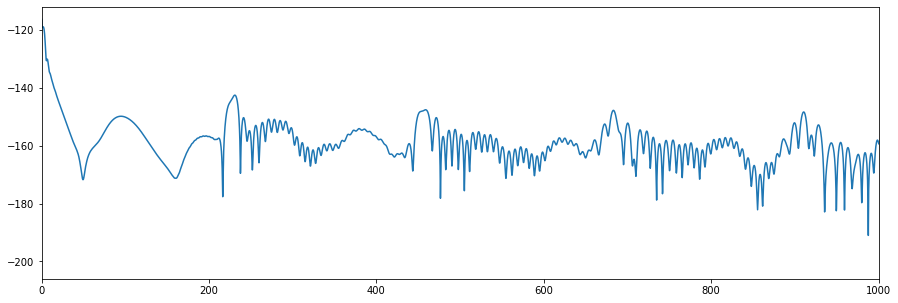

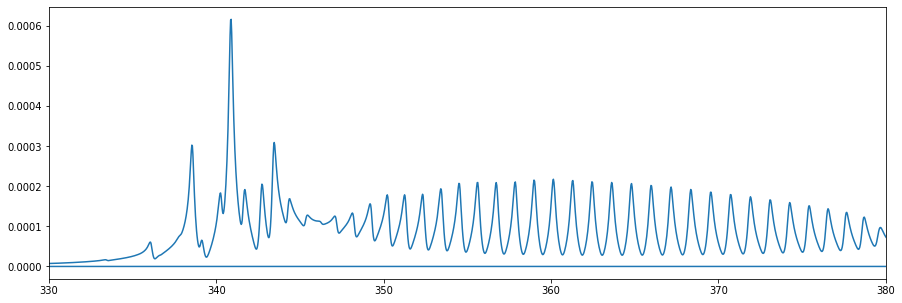

/Users/gilaverbuch/dev/python/SA_FFP/output_.py:300: RuntimeWarning: divide by zero encountered in log10
  displacement[l,:]=20*np.log10(a1/a2)


In [2]:
FFP('input-parameters')

In [ ]:
1000/660